# Machine Learning Regression Models

In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
models = []

In [3]:
# Data
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
df_train.shape, df_test.shape

((1117957, 22), (745305, 21))

In [4]:
# Define X,y
X, y = df_train.drop(columns=["id","FloodProbability"]).values, df_train["FloodProbability"].values

# Test
X_test = df_test.drop(columns=["id"]).values

# Train val split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=20)

We first use `sklearn.preprocessing.StandardScaler` to standardize the input data

In [5]:
# Scaling data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)
X_val_s = scaler.fit_transform(X_val)

## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, r2_score

In [7]:
model_lr = LinearRegression()
model_lr.fit(X_train_s, y_train)

LinearRegression()

In [8]:
model_lr.score(X_train_s,y_train)

0.8453284937322453

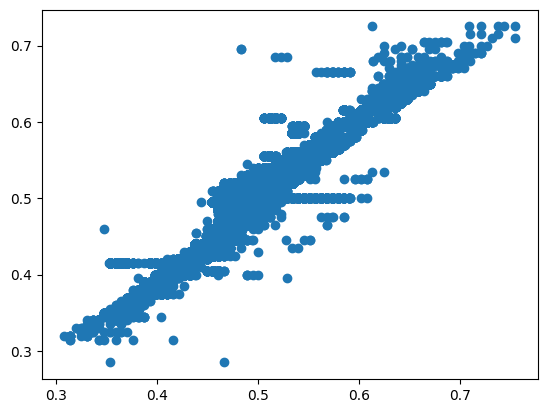

In [9]:
y_val_pred = model_lr.predict(X_val_s)
plt.scatter(y_val_pred, y_val)

In [10]:
# Regression metrics
exp_var = explained_variance_score(y_val, y_val_pred)
max_err = max_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print(f'Explained Variance: {exp_var}')
print(f'Max error: {max_err}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 score: {r2}')
models.append({"model":"Linear Regression", "explained_var": exp_var, "max_err": max_err, "mae": mae, "r2_score": r2, "score": model_lr.score(X_train_s,y_train)})

Explained Variance: 0.8434192634849408
Max error: 0.21189214697883513
Mean Absolute Error: 0.015826508162826297
R2 score: 0.8434189664597784


## Support Vector Regression

In [11]:
from sklearn.svm import SVR

In [12]:
%%time
scores = []
iters = [100,600,1000]
for i in iters:
    model = SVR(max_iter=i)
    model.fit(X_train_s,y_train)
    p = model.score(X_train_s,y_train)
    scores.append(p)
    print(f'Score for {i} iterations: {p}')

c:\Users\Sudarshan Anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Score for 100 iterations: 0.6378338169244699


c:\Users\Sudarshan Anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=600).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Score for 600 iterations: 0.6657583198316076
Score for 1000 iterations: 0.6656499296223517
CPU times: total: 3min 6s
Wall time: 3min 14s


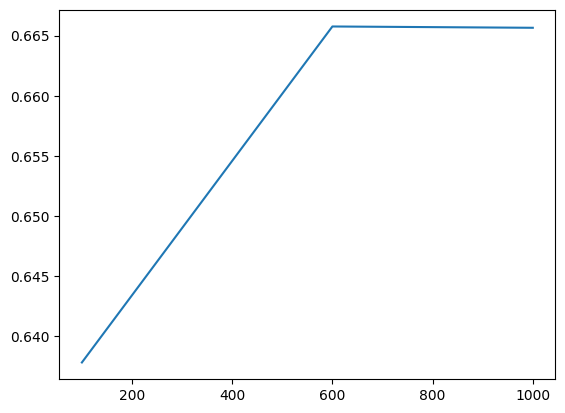

In [13]:
plt.plot(iters,scores)
plt.show()

In [14]:
model_svr = SVR(max_iter=600)
model_svr.fit(X_train_s,y_train)
model_svr.score(X_train_s,y_train)

c:\Users\Sudarshan Anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=600).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.6657583198316076

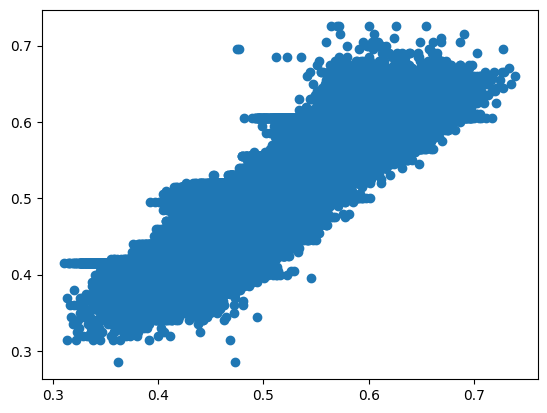

In [15]:
y_val_pred = model_svr.predict(X_val_s)
plt.scatter(y_val_pred, y_val)

In [16]:
# Regression metrics
exp_var = explained_variance_score(y_val, y_val_pred)
max_err = max_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print(f'Explained Variance: {exp_var}')
print(f'Max error: {max_err}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 score: {r2}')
models.append({"model":"Support Vector Regression", "explained_var": exp_var, "max_err": max_err, "mae": mae, "r2_score": r2, "score": model_svr.score(X_train_s,y_train)})

Explained Variance: 0.7132463204588079
Max error: 0.2197095893230973
Mean Absolute Error: 0.024056786842711626
R2 score: 0.6635778046247329


## Random Forest Regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor

We try different number of estimators, emperically we found that:
- `n_estimators=25`: score=0.941
- `n_estimators=50`: score=0.948
- `n_estimators=100`: score=0.951

Since we get only marginal variation in the scores, we just go with `n_estimators=25`

In [18]:
%%time
model_rf = RandomForestRegressor(n_estimators=25,max_depth=30)
model_rf.fit(X_train_s, y_train)
model_rf.score(X_train_s, y_train)

CPU times: total: 7min 40s
Wall time: 8min 46s


0.9419591171376036

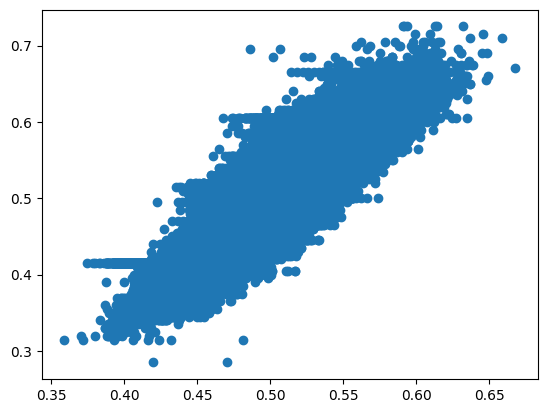

In [19]:
y_val_pred = model_rf.predict(X_val_s)
plt.scatter(y_val_pred, y_val)

In [20]:
# Regression metrics
exp_var = explained_variance_score(y_val, y_val_pred)
max_err = max_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print(f'Explained Variance: {exp_var}')
print(f'Max error: {max_err}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 score: {r2}')
models.append({"model":"Random Forest Regression", "explained_var": exp_var, "max_err": max_err, "mae": mae, "r2_score": r2, "score": model_rf.score(X_train_s,y_train)})

Explained Variance: 0.6373722705963182
Max error: 0.20879999999999999
Mean Absolute Error: 0.024976571220018926
R2 score: 0.6371814594620968


In [21]:
pd.DataFrame(models)

,model,explained_var,max_err,mae,r2_score,score
0,Linear Regression,0.843419,0.211892,0.015827,0.843419,0.845328
1,Support Vector Regression,0.713246,0.219710,0.024057,0.663578,0.665758
2,Random Forest Regression,0.637372,0.208800,0.024977,0.637181,0.941959


## Ensemble of the three

In [22]:
from sklearn.ensemble import VotingRegressor

In [23]:
estimators = [('Linear', model_lr), ('SVR', model_svr), ('RF', model_rf)]
ensemble = VotingRegressor(estimators, weights=np.array([1.5, 1.0, 1.25]), verbose=True)

In [24]:
ensemble.fit(X_train_s, y_train)
ensemble.score(X_train_s, y_train)

[Voting] ................... (1 of 3) Processing Linear, total=   2.3s


c:\Users\Sudarshan Anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=600).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[Voting] ...................... (2 of 3) Processing SVR, total=  39.9s
[Voting] ....................... (3 of 3) Processing RF, total= 7.5min


0.8881363750556261

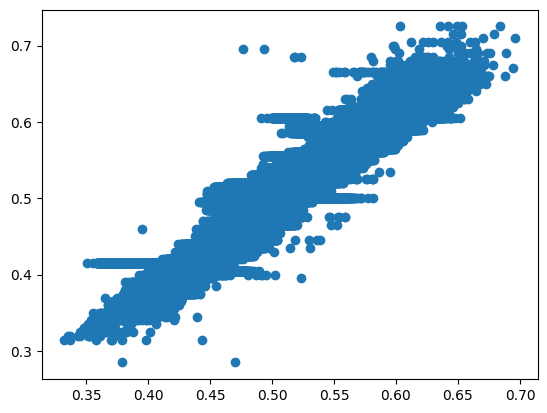

In [25]:
y_val_pred = ensemble.predict(X_val_s)
plt.scatter(y_val_pred, y_val)

In [26]:
# Regression metrics
exp_var = explained_variance_score(y_val, y_val_pred)
max_err = max_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print(f'Explained Variance: {exp_var}')
print(f'Max error: {max_err}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 score: {r2}')
models.append({"model":"LR + SVR + RF", "explained_var": exp_var, "max_err": max_err, "mae": mae, "r2_score": r2, "score": ensemble.score(X_train_s,y_train)})

Explained Variance: 0.8126638324563558
Max error: 0.21841274927769339
Mean Absolute Error: 0.018085115987198048
R2 score: 0.8096659480017385


In [27]:
pd.DataFrame(models)

,model,explained_var,max_err,mae,r2_score,score
0,Linear Regression,0.843419,0.211892,0.015827,0.843419,0.845328
1,Support Vector Regression,0.713246,0.219710,0.024057,0.663578,0.665758
2,Random Forest Regression,0.637372,0.208800,0.024977,0.637181,0.941959
3,LR + SVR + RF,0.812664,0.218413,0.018085,0.809666,0.888136


Linear Regression single-handedly beats all the other models and the ensemble